# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tsabita Irene Adielia
- **Email:** tsabitairene@gmail.com
- **ID Dicoding:** tsabitairene

## Menentukan Pertanyaan Bisnis

- Kapan waktu tersibuk untuk penyewaan sepeda?
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load datasets
day_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/hour.csv')

# Quick preview of the data
print("Day Dataset Preview:")
print(day_df.head())

print("\nHour Dataset Preview:")
print(hour_df.head())

Day Dataset Preview:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour

**Insight:**
- Dataset 'day.csv' berisi data harian penyewaan sepeda.
- Dataset 'hour.csv' berisi data penyewaan sepeda berdasarkan jam.

### Assessing Data

In [4]:
# Basic info
print("\nDay Dataset Info:")
print(day_df.info())

print("\nHour Dataset Info:")
print(hour_df.info())

# Checking for missing values
print("\nMissing Values in Day Dataset:")
print(day_df.isnull().sum())

print("\nMissing Values in Hour Dataset:")
print(hour_df.isnull().sum())


Day Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Hour Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

**Insight:**
- Tidak ada nilai yang hilang di kedua dataset.
- Semua kolom memiliki tipe data yang sesuai.

### Cleaning Data

In [5]:
# Mengubah kolom tanggal menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight:**
- Tidak ditemukan data duplikat.
- Kolom 'dteday' telah dikonversi menjadi datetime untuk memudahkan analisis waktu.

## Exploratory Data Analysis (EDA)

### Explore Distribusi Penyewaan Sepeda Harian

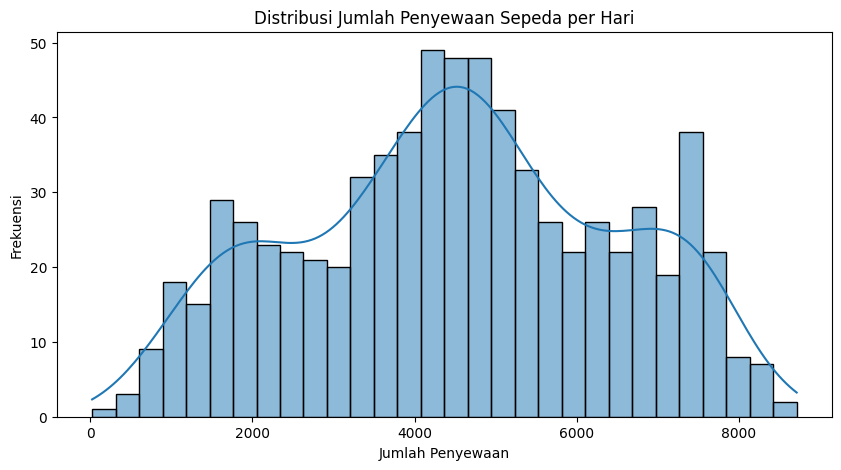

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda Harian')
plt.xlabel('Jumlah Penyewaan (cnt)')
plt.ylabel('Frekuensi')
plt.show()

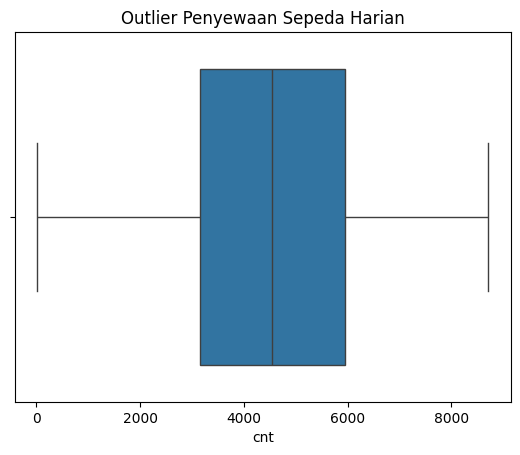

In [10]:
# Mengidentifikasi outlier
sns.boxplot(x=day_df['cnt'])
plt.title('Outlier Penyewaan Sepeda Harian')
plt.show()

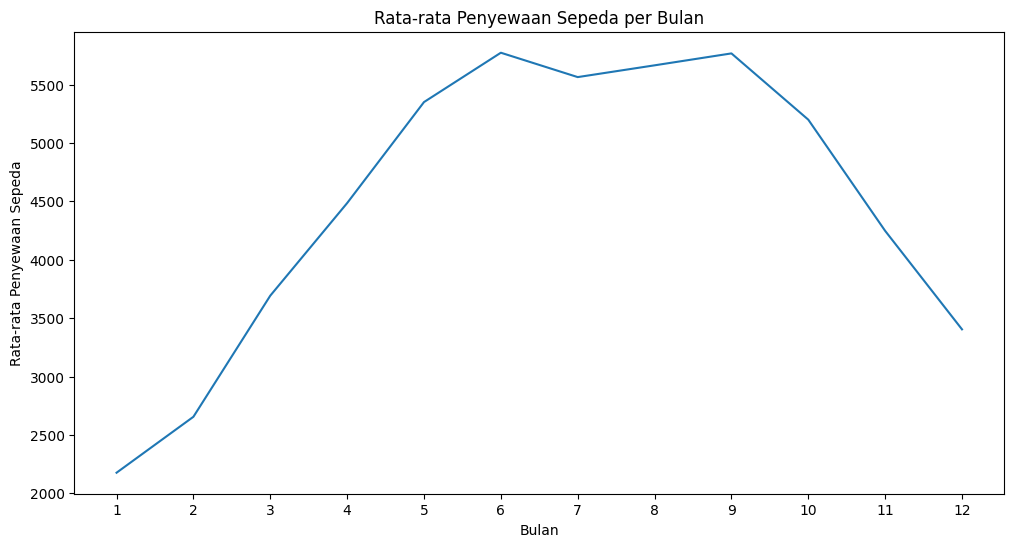

In [11]:
# Menambahkan kolom tahun dan bulan
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month

# Analisis tren bulanan
monthly_rentals = day_df.groupby('month')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_rentals, x='month', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(range(1, 13))
plt.show()

### Explore Rata-rata Penyewaan Sepeda per Jam


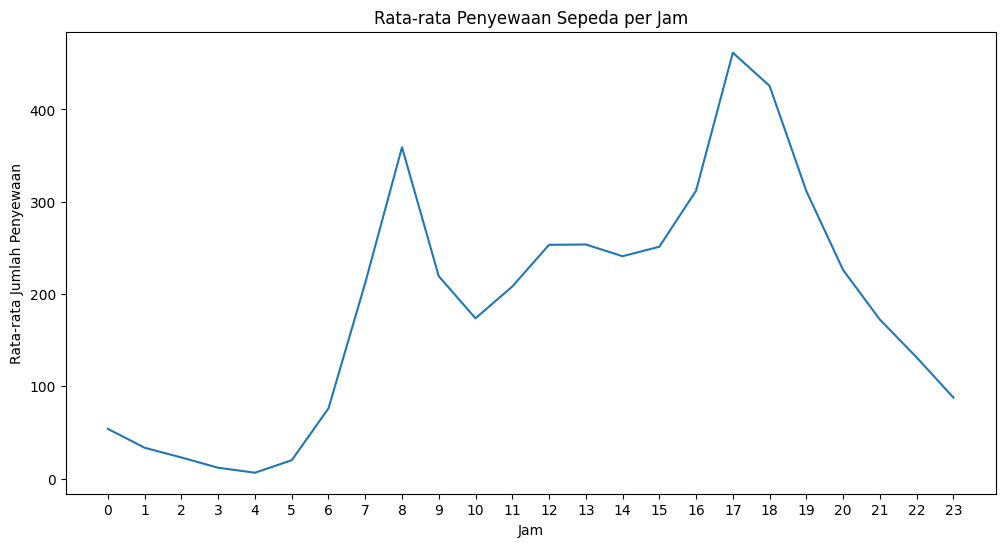

In [7]:
hourly_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.show()

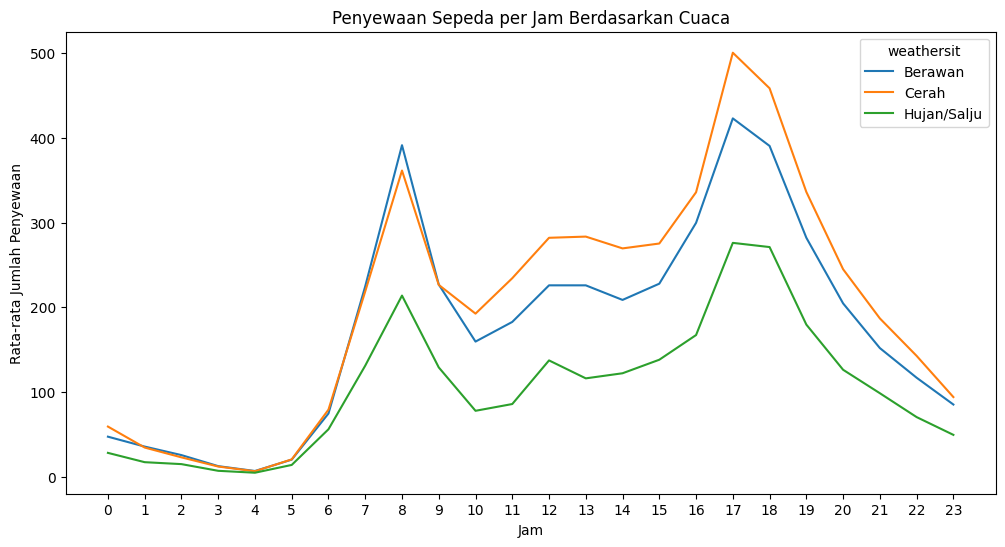

In [12]:
# Analisis penyewaan sepeda per jam berdasarkan cuaca
hour_df['weathersit'] = hour_df['weathersit'].map({1: 'Cerah', 2: 'Berawan', 3: 'Hujan/Salju'})
hourly_rentals_by_weather = hour_df.groupby(['hr', 'weathersit'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals_by_weather, x='hr', y='cnt', hue='weathersit')
plt.title('Penyewaan Sepeda per Jam Berdasarkan Cuaca')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.show()

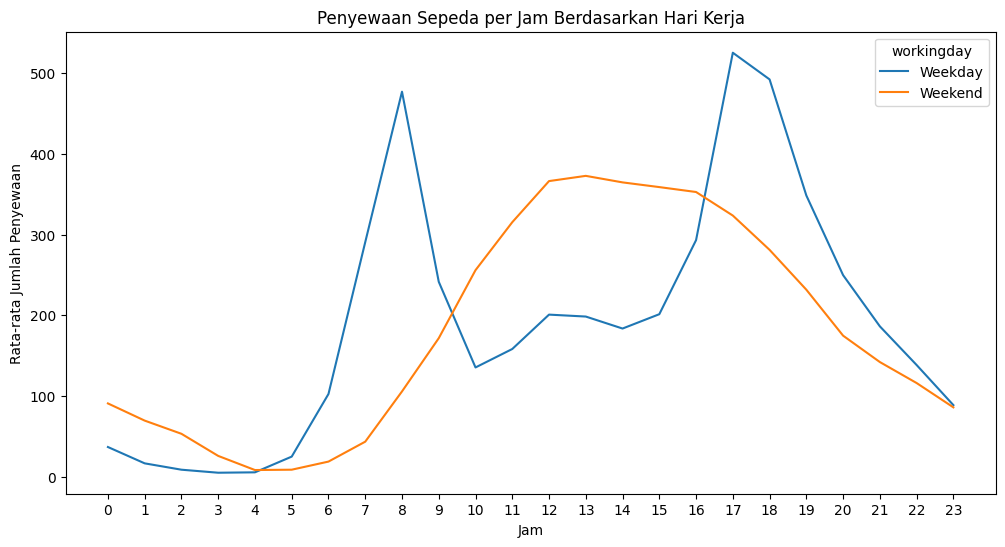

In [13]:
# Analisis penyewaan sepeda per jam berdasarkan apakah hari kerja atau tidak
hour_df['workingday'] = hour_df['workingday'].map({0: 'Weekend', 1: 'Weekday'})
hourly_rentals_by_workingday = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals_by_workingday, x='hr', y='cnt', hue='workingday')
plt.title('Penyewaan Sepeda per Jam Berdasarkan Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.show()

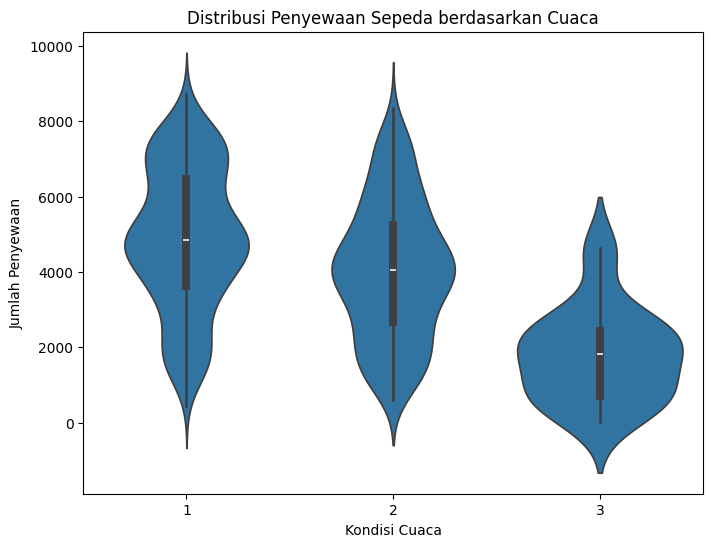

In [14]:
# Menggunakan Violin Plot untuk distribusi penyewaan berdasarkan cuaca
plt.figure(figsize=(8, 6))
sns.violinplot(data=day_df, x='weathersit', y='cnt')
plt.title('Distribusi Penyewaan Sepeda berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Penyewaan sepeda sangat dipengaruhi oleh waktu (jam, bulan) dan kondisi eksternal (cuaca, hari kerja/akhir pekan).

- Cuaca dan musim menjadi faktor penting yang menurunkan atau meningkatkan volume penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa waktu tersibuk untuk penyewaan sepeda?

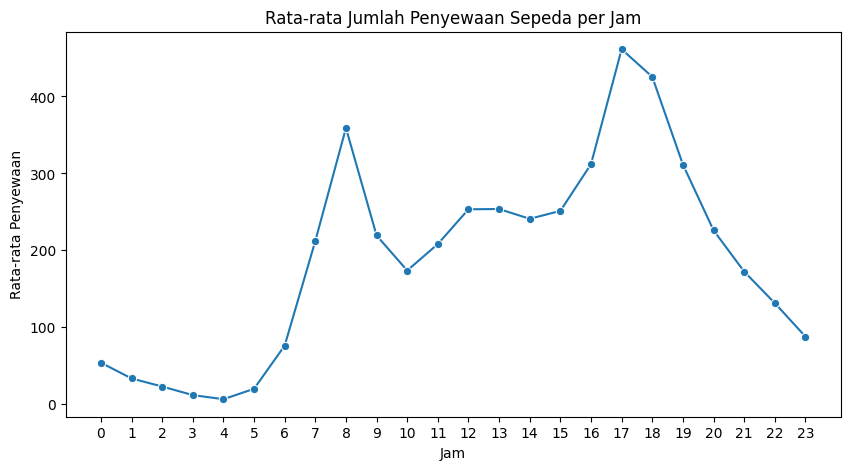

In [17]:
# Tambah konversi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['hour'] = hour_df['hr']

# Rata-rata penyewaan tiap jam
avg_hourly = hour_df.groupby('hour')['cnt'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_hourly, x='hour', y='cnt', marker='o')
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewaan?

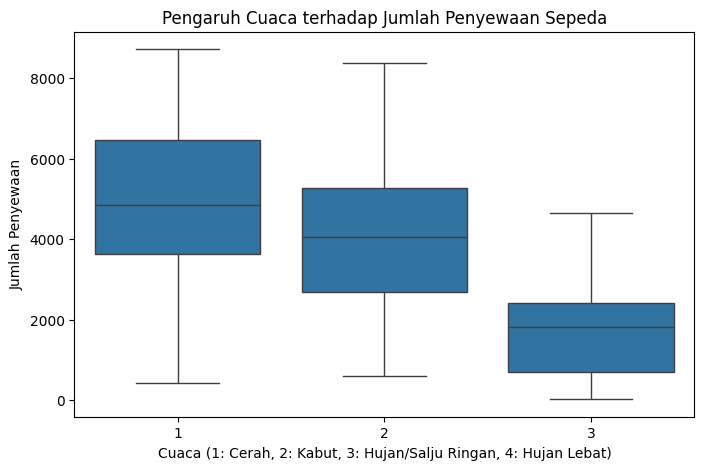

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Cuaca (1: Cerah, 2: Kabut, 3: Hujan/Salju Ringan, 4: Hujan Lebat)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Waktu tersibuk terjadi di pagi hari (sekitar jam 8) dan sore hari (sekitar jam 17-18), kemungkinan terkait jam pergi dan pulang kerja.
- Penyewaan sepeda tertinggi terjadi saat cuaca cerah. Jumlah penyewaan menurun drastis pada cuaca buruk seperti hujan ringan atau salju.


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Waktu tersibuk untuk penyewaan sepeda adalah pagi (sekitar jam 8) dan sore (sekitar jam 17-18).
- Conclution pertanyaan 2: Cuaca cerah berhubungan dengan jumlah penyewaan sepeda yang tinggi, sedangkan cuaca buruk menurunkan jumlah penyewaan.